In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import time
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
df = pd.read_csv('/content/waze_dataset.csv')

In [ ]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [ ]:
df.isna().sum()
df['device'] = pd.Categorical(df['device']).codes

In [ ]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,1
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,1
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,1


In [ ]:
X = df.drop(columns=['label'])
y = df['label']
X_labeled = X[y.notna()]
y_labeled = y[y.notna()]
X_unlabeled = X[y.isna()]

In [ ]:
scaler = StandardScaler()
X_labeled_scaled = scaler.fit_transform(X_labeled)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_labeled_scaled, y_labeled)

KNeighborsClassifier()

In [ ]:
# Predict the missing labels for unlabeled data
y_unlabeled_pred = knn.predict(X_unlabeled_scaled)

# Combine the results back into the original dataset
df.loc[y.isna(), 'label'] = y_unlabeled_pred

In [ ]:
df.isna().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [ ]:
df['label'].value_counts().sort_values(ascending=False)

,count
label,
retained,12421
churned,2578


In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,0.644843
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.478577
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,1.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.000000


<Axes: >

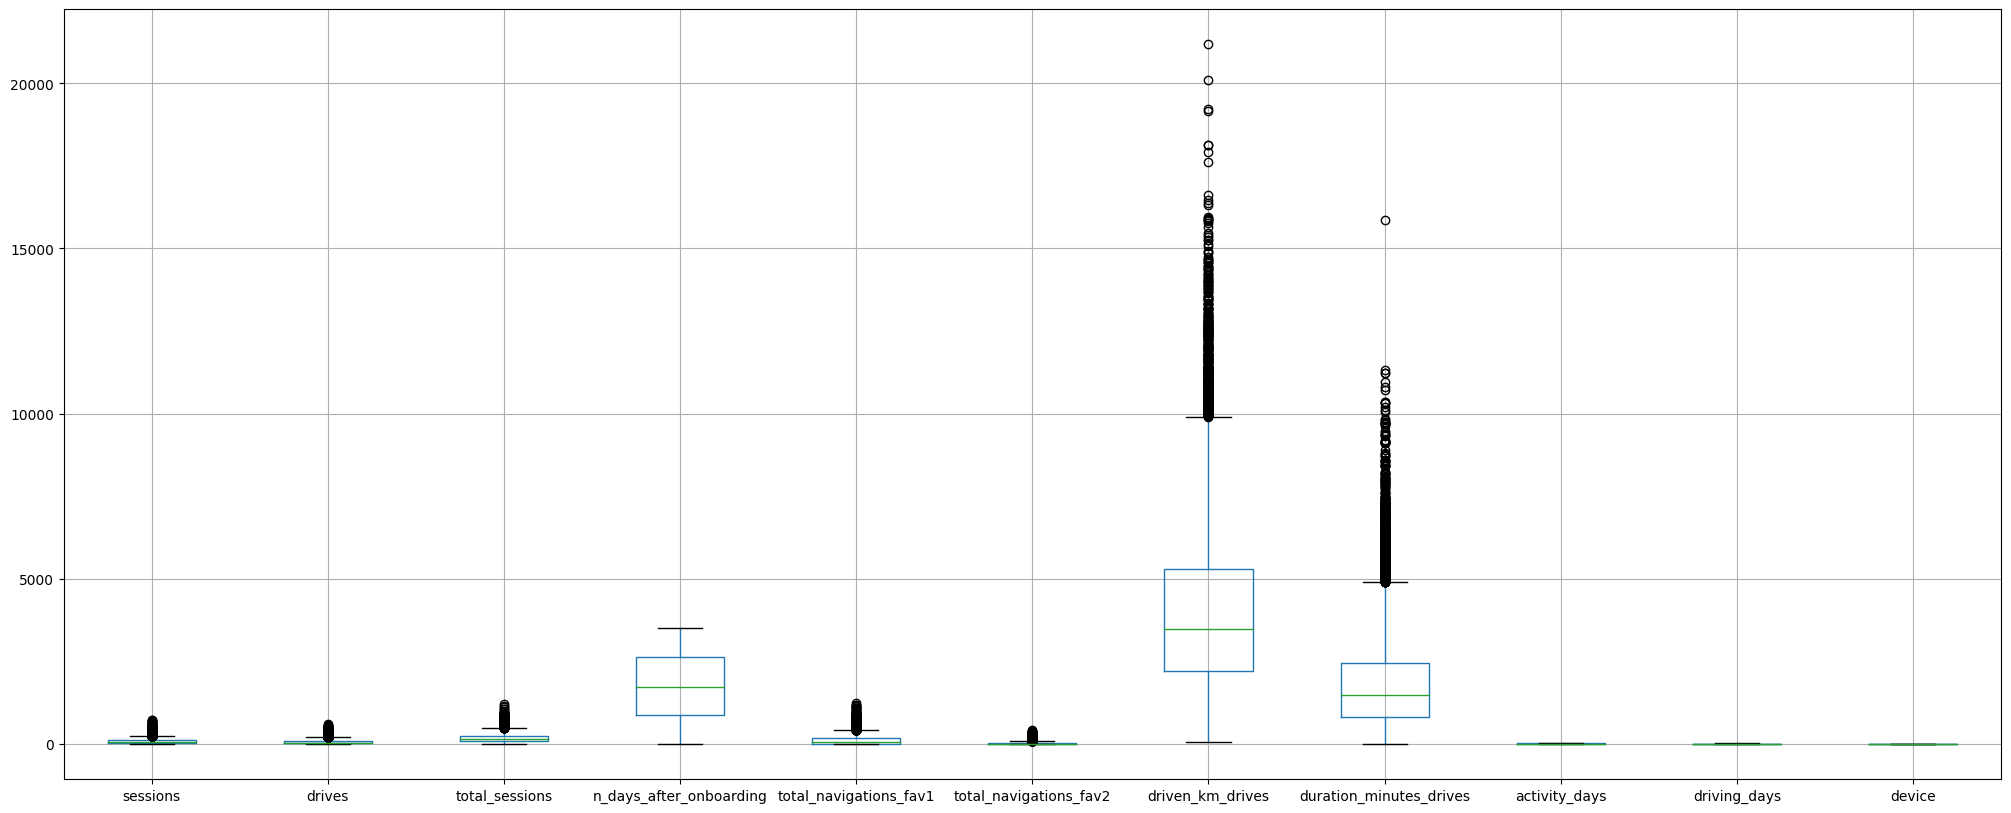

In [ ]:
df.boxplot(figsize=(25,10))

array([[<Axes: title={'center': 'sessions'}>,
        <Axes: title={'center': 'drives'}>,
        <Axes: title={'center': 'total_sessions'}>],
       [<Axes: title={'center': 'n_days_after_onboarding'}>,
        <Axes: title={'center': 'total_navigations_fav1'}>,
        <Axes: title={'center': 'total_navigations_fav2'}>],
       [<Axes: title={'center': 'driven_km_drives'}>,
        <Axes: title={'center': 'duration_minutes_drives'}>,
        <Axes: title={'center': 'activity_days'}>],
       [<Axes: title={'center': 'driving_days'}>,
        <Axes: title={'center': 'device'}>, <Axes: >]], dtype=object)

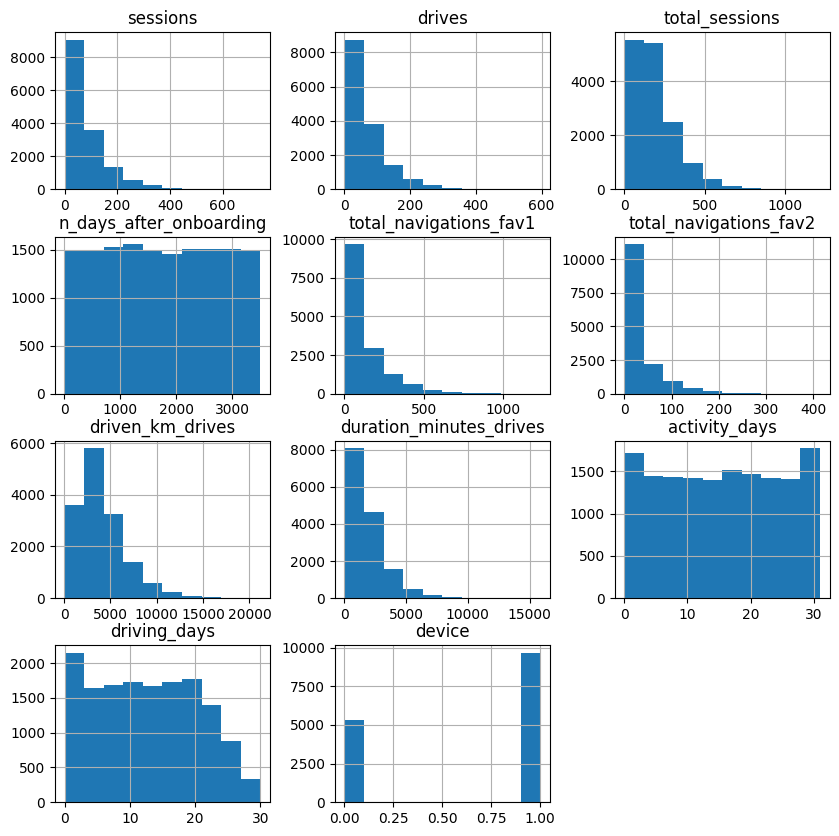

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df = df.dropna()
df['label'] = pd.Categorical(df['label']).codes

In [ ]:
df['label'].value_counts().sort_values(ascending=False)

,count
label,
1,12421
0,2578


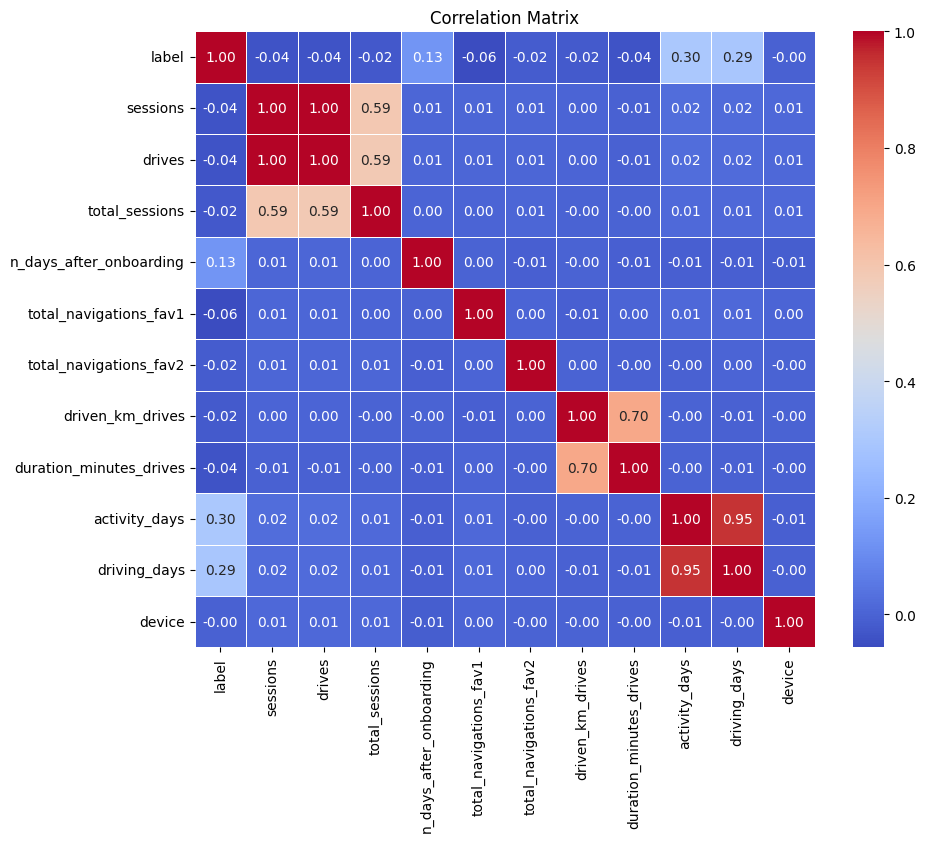

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Optional: To adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop(columns=['label'])
#X = X.drop(columns=['device'])
y = df['label']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

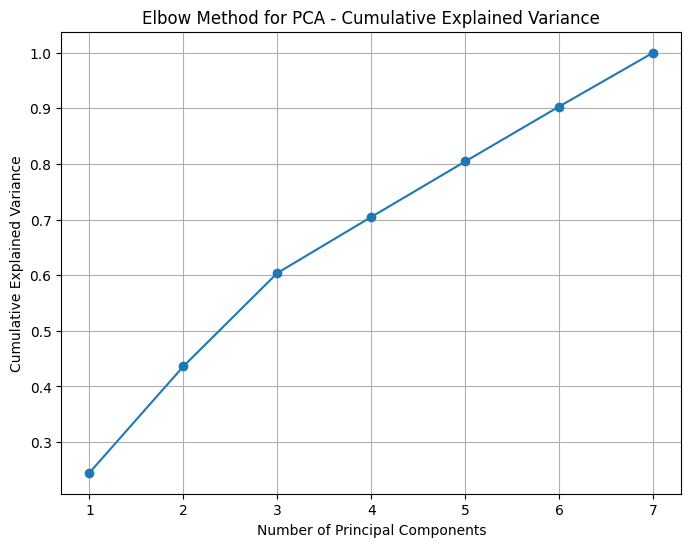

In [ ]:
pca = PCA()
pca.fit(X_train)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the Elbow method (Cumulative Explained Variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Elbow Method for PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

In [ ]:
n_components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Number of components explaining 90% variance: {n_components_90_variance}')

Number of components explaining 90% variance: 6


In [ ]:
X_train = pca.transform(X_train)[:, :n_components_90_variance]

In [ ]:
X_test = pca.transform(X_test)[:, :n_components_90_variance]

In [ ]:
model = LogisticRegression(
    penalty='l1',
    dual=False,
    tol=1e-4,
    C=0.1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight='balanced',  # Handling imbalance
    random_state=42,
    solver='saga',
    max_iter=1000,
    multi_class='multinomial',
    verbose=0,
    warm_start=False,
    n_jobs=None,
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model.fit(X_train_res, y_train_res)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', penalty='l1', random_state=42,
                   solver='saga')

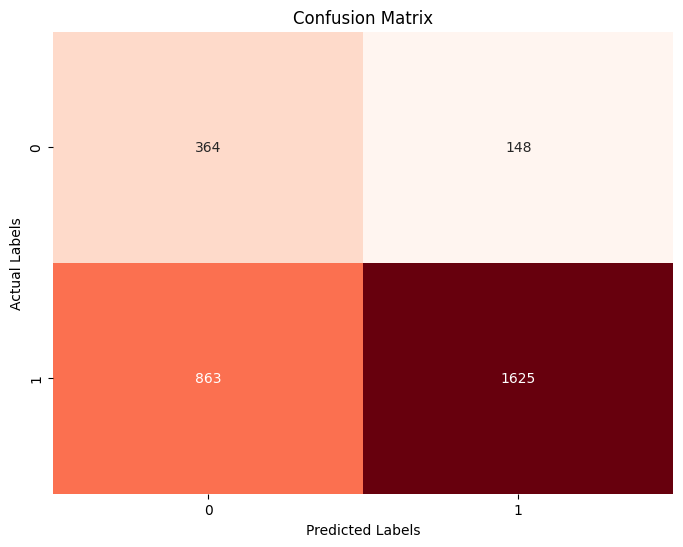

              precision    recall  f1-score   support

           0       0.30      0.71      0.42       512
           1       0.92      0.65      0.76      2488

    accuracy                           0.66      3000
   macro avg       0.61      0.68      0.59      3000
weighted avg       0.81      0.66      0.70      3000



In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Choose a custom threshold (e.g., 0.3) for classification
threshold = 0.5
y_pred_custom = (y_prob >= threshold).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, y_pred_custom))

One class SVM Accuracy: 18.50%
Time taken in One class SVM training: 0.2054 seconds
Time taken in One class SVM testing: 0.0417 seconds
              precision    recall  f1-score   support

           0       0.17      0.97      0.29       512
           1       0.81      0.02      0.04      2488

    accuracy                           0.18      3000
   macro avg       0.49      0.50      0.17      3000
weighted avg       0.70      0.18      0.09      3000



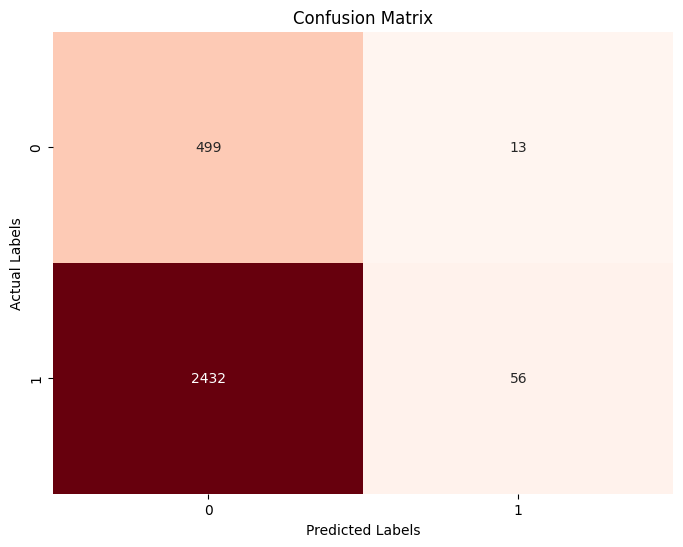

In [ ]:
model = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 'auto')
start_time_train = time.time()
# Train the model
model.fit(X_train, y_train)
end_time_train = time.time()
# Make predictions
start_time_test = time.time()
y_pred = model.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]
end_time_test = time.time()
# Calculate accuracy
accuracy_svm_1 = accuracy_score(y_test, y_pred)
print(f'One class SVM Accuracy: {accuracy_svm_1 * 100:.2f}%')

execution_time_train = end_time_train - start_time_train
print(f'Time taken in One class SVM training: {execution_time_train:.4f} seconds')

execution_time_test = end_time_test - start_time_test
print(f'Time taken in One class SVM testing: {execution_time_test:.4f} seconds')

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
count_class_0, count_class_1 = np.bincount(y_train)
scale_pos_weight = count_class_0 / count_class_1

# Create the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',   # Binary classification
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
    eval_metric='logloss'  ,        # Suppress warning
    use_label_encoder=False,
    random_state=42,
    max_depth=8,
    n_estimators=100,
    learning_rate=0.1
)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_resampled, y_resampled, cv=stratified_kfold, scoring='recall_weighted')

print("Cross-Validation Recall: ", scores.mean())
print("\n")
# Fit the model on the resampled dataset
model.fit(X_resampled, y_resampled)


Cross-Validation Recall:  0.6879593395327874




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Recall: 0.4055466237942122
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.81      0.35       512
           1       0.91      0.41      0.56      2488

    accuracy                           0.47      3000
   macro avg       0.57      0.61      0.45      3000
weighted avg       0.79      0.47      0.52      3000



Epoch 1/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6221 - loss: 0.7700 - val_accuracy: 0.8012 - val_loss: 0.6586
Epoch 2/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6359 - loss: 0.6439 - val_accuracy: 0.7544 - val_loss: 0.5926
Epoch 3/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6512 - loss: 0.6407 - val_accuracy: 0.9149 - val_loss: 0.7320
Epoch 4/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5586 - loss: 0.6771 - val_accuracy: 0.0000e+00 - val_loss: 0.8823
Epoch 5/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5484 - loss: 0.6909 - val_accuracy: 0.0000e+00 - val_loss: 0.9245
Epoch 6/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5554 - loss: 0.6889 - val_accuracy: 0.0000e+00 - val_loss: 0.7139
Epoch 7/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5574 - loss: 0.6878 - val_accuracy: 0.0000e+00 - val_loss: 0.8558
Epoch 8/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5448 - loss: 0

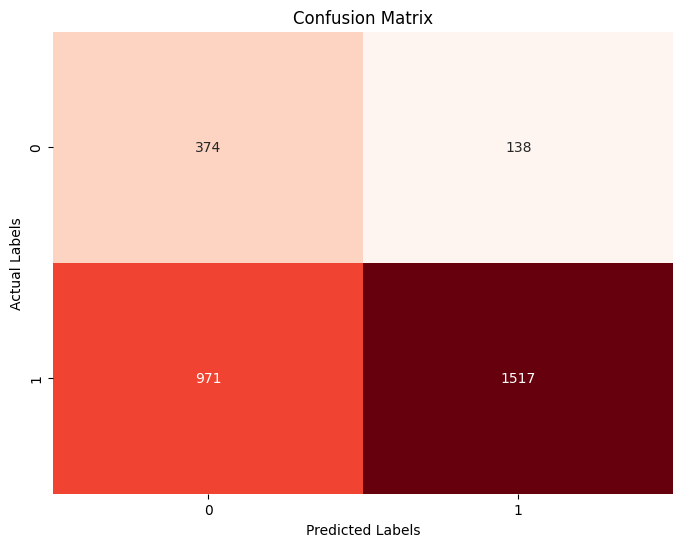

In [ ]:
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Early stopping and model checkpoint callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with early stopping and checkpointing
history = model.fit(X_train_res, y_train_res,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint])

# Load the best model
best_model = keras.models.load_model('best_model.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()
